# In this notebook I write the script to call MuhRec on all time bins created by the TOF_BinImages

## I furthermore create the picture for the Neuwave abstract 

In [1]:
%%time
from subprocess import call
from math import fmod
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import os
import shutil
import numpy as np
%matplotlib inline
# %matplotlib notebook

from astropy.io import fits
import xml.etree.ElementTree as ET

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

from Orthogonal_views import PlotOrtogonalViews
import matplotlib.gridspec as gridspec

from matplotlib.animation import FuncAnimation

from mpl_toolkits.mplot3d import Axes3D
import AdvancedBraggEdgeFitting_v2
import TOF_routines

Wall time: 5.57 s


In [ ]:
%%time

projpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/"
destpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin" #it is actually 250! TO CORRECT
# path to the application
muhrec=r"C:/Users/carminati_c/Desktop/imagingscience/muhrecCLI.exe"
# cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Recon_WhiteBeam/ReconConfig.xml"
cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_WhiteBeam/ReconConfig.xml"
#first try
# filemask ="projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00000.fits"
# obmask ="projections:obfilemask=D:/Kaestner/ISIS_IAEAData\RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_ob_binned_00000.fits"
obfirstindex ="projections:obfirstindex=2"
obcount ="projections:obcount=2"
# path = r"/bin0000"
# outputpath="matrix:path="+destpath+path

# print(outputpath)



first_bin=0
last_bin=165
for i in range(first_bin, last_bin):
    filemask ="projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_"+str(i).zfill(5)+".fits"
    path = r"/bin"+str(i).zfill(4)
    outputpath="matrix:path="+destpath+path

    obmask ="projections:obfilemask=D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_tomo_binned_"+str(i).zfill(5)+".fits"
    print(filemask)
    print(outputpath)
#     print(obmask)

    if not os.path.exists(destpath+path):
        os.makedirs(destpath+path)

#     print(muhrec)
#     print(cfgpath)
    call([muhrec, "-f", cfgpath, filemask, obmask, obfirstindex, obcount, outputpath])


In [ ]:
# here I create different ReconConfig for different bins, as I need to change the input of the BBLogNorm external images

# Open original file
et = ET.parse('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_WhiteBeam_BBcorrected/ReconConfig.xml')
root = et.getroot()


#whit this I find all modules in the pre-processing chain
for module in root.findall('./processchain/preprocessing/module'):
    name= module.find('modulename')
    print(name.text)



BBmodule = root.find('./processchain/preprocessing/module/modulename') ## find the first one, which is always the BBLogNorm
BB_OB_ext_name=root.find('./processchain/preprocessing/module/parameters/BB_OB_ext_name')
BB_sample_ext_name=root.find('./processchain/preprocessing/module/parameters/BB_sample_ext_name')

filemask = root.find('./projections/filemask')
outputpath = root.find('./matrix/path')
obmask = root.find('./projections/obfilemask')
obfirstindex = root.find('./projections/obfirstindex')
projpath = root.find('./projections/path')
projrefpath = root.find('./projections/referencepath')

## Uncomment this to check the original texts
# print(BBmodule)
# print(BBmodule.text)
# print(BB_OB_ext_name.text)
# print(BB_sample_ext_name.text)
# print(filemask.text)
# print(outputpath.text)
# print(obmask.text)
# print(obfirstindex.text)
# print(projpath.text)
# print(projrefpath.text)



# Loop over the bins to create the ReconConfig
first_bin=0
last_bin=165
for i in range(first_bin, last_bin):
    destpath=r"D:Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin_249_BBcorrected" 
    path = r"/bin"+str(i).zfill(4)+"/"
    BB_OB_ext_name.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_'+str(i).zfill(4)+'/BackGround_0000.fits'
    BB_sample_ext_name.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_'+str(i).zfill(4)+'/BackGround_####.fits'
    filemask.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned\IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    outputpath.text = destpath+path
    obmask.text = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    obfirstindex.text=str(2)
    projpath.text=' '
    projrefpath.text=' '

    fileconfigpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations'
    fileconfigname = '/ReconConfig_bin'+str(i).zfill(4)+'.xml'
    et.write(fileconfigpath+fileconfigname) # It works!!
    if not os.path.exists(destpath+path):
        os.makedirs(destpath+path)

In [ ]:
# Here I run MuhRec in a loop loading the different ReconConfig that I have created in the previous cell
muhrec=r"C:/Users/carminati_c/muhrec/muhrecCLI.exe"
cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin"+str(0).zfill(4)+".xml"
%%time

for i in range(first_bin, last_bin):
    cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin"+str(i).zfill(4)+".xml"
    print('Running: ...... ', cfgpath)
    call([muhrec, "-f", cfgpath]) # It does!

In [ ]:
# Here i try to make some plots

In [ ]:
# img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\Recon_WhiteBeam\slice_0405.tif')
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam\slice_0405.tif')
img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected\slice_0405.tif')

plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2)
plt.axis('off')
plt.colorbar(cs)
plt.savefig('WhiteBeam.tif') # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB, cmap='gray',vmin=0.0, vmax=2)
plt.axis('off')
plt.colorbar(cs)
plt.savefig('WhiteBeam_BB.tif') # This is also to be updated as i
plt.savefig('WhiteBeam_BB.pdf')


In [ ]:
# TODO:
# [OK] read this very sama image for the entire spectrum
# [] bin accordingly the spectrum
# [] make the plots in some meaningful ROIs
# RoiS

In [ ]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img[:,:,i]=io.imread(filename)
    print(filename)

In [ ]:
# io.imshow(spectrum_img[:,:,80])
# io.imshow(img_WB[150:200,80:140]) #Ti
# io.imshow(img_WB[55:100,200:250]) #Fe
# io.imshow(img_WB[300:350, 80:120]) #Pb
#io.imshow(img_WB[128:180,350:400]) #Ni
#io.imshow(img_WB[380:430,230:280]) #Cu a little bit high number, no?
plt.figure()
plt.imshow(spectrum_img[:,:,100])

plt.figure()
plt.imshow(spectrum_img[:,250,:])

plt.figure()
plt.imshow(spectrum_img[250,:,:])

print(np.shape(spectrum_img))


In [ ]:
# I now load the images with BB correction
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
    print(filename)

In [ ]:
# TODO: make this picture much nicer

fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(spectrum_img_BB.shape[0])/float(spectrum_img_BB.shape[1]),1]
mywidth_ratios = [1, float(spectrum_img_BB.shape[1])/float(spectrum_img_BB.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViews(spectrum_img_BB,gs,fig,'title', -0.1, 3.0, 0.055)
# plt.savefig('CT_ref_OS.pdf')

In [2]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)

In [3]:
def tof2l(tof):
    l=lambda0+h/m*(tof-t0)/(L)/1e-10
    return l

def l2tof(l):
    tof=t0+(l*1e-10)*(L)*m/h
    return tof

In [4]:
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0

In [5]:
myLambda = tof2l(myTOF)

In [ ]:
plt.plot(myLambda)
print(np.shape(myLambda))

In [ ]:
2970/165

In [ ]:
#spectrum TI ROI: [150:200,80:140]
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[150:200,80:140,i])
    Pb[i] = np.median(spectrum_img[55:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:120,i])
    Cu[i] = np.median(spectrum_img[128:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Ti_BB[i] = np.median(spectrum_img_BB[150:200,80:140,i])
    Pb_BB[i] = np.median(spectrum_img_BB[55:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:120,i])
    Cu_BB[i] = np.median(spectrum_img_BB[128:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    

In [6]:
lambda_bin = myLambda[1::18]

In [ ]:
print(np.shape(lambda_bin))
print(np.shape(Ti))
print(np.shape(myLambda))

In [8]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')


(300, 2)


In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(6, 6))


plt.subplot(513)
plt.plot(lambda_bin, Ni/np.max(Ni))
plt.plot(data_Ni[:,0],data_Ni[:,1]/np.max(data_Ni[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe/np.max(Fe),'g')
plt.plot(data_Fe[:,0],data_Fe[:,1]/np.max(data_Fe[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti/np.max(Ti),'r')
plt.plot(data_Ti[:,0],data_Ti[:,1]/np.max(data_Ti[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb/np.max(Pb), 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1]/np.max(data_Pb[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu/np.max(Cu), 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1]/np.max(data_Cu[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Cu')

plt.subplots_adjust(hspace=0.9)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center')
fig.text(0.04, 0.5, 'normalized attenuation', va='center', rotation='vertical')

plt.savefig('spectra_plots_normalized.tiff')
# plt.savefig('spectra_plots_normalized.pdf')

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni') 
plt.grid(alpha=0.5)


plt.subplot(514)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')
plt.grid(alpha=0.5)

plt.subplot(515)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')
plt.grid(alpha=0.5)

plt.subplot(511)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')
plt.grid(alpha=0.5)

plt.subplot(512)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')
plt.grid(alpha=0.5)

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center',fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('spectra_plots.tiff')
plt.savefig('spectra_plots_NOBB.png', dpi=500)
plt.savefig('spectra_plots.pdf')

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni') 
plt.grid(alpha=0.5)

plt.subplot(514)
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')
plt.grid(alpha=0.5)

plt.subplot(515)
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')
plt.grid(alpha=0.5)

plt.subplot(511)
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')
plt.grid(alpha=0.5)

plt.subplot(512)
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')
plt.grid(alpha=0.5)

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# plt.tight_layout()
plt.savefig('spectra_plots_BBcorrected.tiff')
plt.savefig('spectra_plots_BBcorrected.pdf')
plt.savefig('spectra_plots_BBcorrected.png', dpi=500)

In [ ]:
plt.figure()
plt.plot(lambda_bin, Cu/np.max(Cu), 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1]/np.max(data_Cu[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Cu')

plt.figure()
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')


plt.figure()
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')

In [ ]:
plt.figure()
plt.plot(lambda_bin, Fe/np.max(Fe),'g')
plt.plot(data_Fe[:,0],data_Fe[:,1]/np.max(data_Fe[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Fe')

plt.figure()
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

plt.figure()
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

In [ ]:
# plt.figure()
# plt.plot(lambda_bin, Ti/np.max(Ti),'r')
# plt.plot(data_Ti[:,0],data_Ti[:,1]/np.max(data_Ti[:,1]),'--k',linewidth=1)
# plt.yticks([], [])
# plt.title('Ti')

# plt.figure()
# plt.plot(lambda_bin, Ti,'r')
# plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
# plt.title('Ti')

plt.figure()
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')

# plt.figure()
# plt.plot(lambda_bin, Ti_BB,'r')
# plt.plot(lambda_bin, Ti,'--k',linewidth=1)
# plt.title('Ti')

In [ ]:
plt.figure()
plt.plot(lambda_bin, Pb/np.max(Pb), 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1]/np.max(data_Pb[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Pb')

plt.figure()
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

plt.figure()
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

In [ ]:
plt.figure()
plt.plot(lambda_bin, Ni/np.max(Ni))
plt.plot(data_Ni[:,0],data_Ni[:,1]/np.max(data_Ni[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ni') 

plt.figure()
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni')

plt.figure()
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni')


# 4D data analysis

In [ ]:
# Here I read the 4D spectra.. It read!!
nBins=165 
nSlices = 190
spectrum_img_BB_4D=np.zeros((476,476,nSlices,nBins))
print(np.shape(spectrum_img_BB_4D))
for i in range (0, nBins):
    print('nBin: ....' , i)
    for j in range(275, 465):
        print(j)
        print(j-275)
        filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
#         print(filename)
        spectrum_img_BB_4D[:,:,j-275,i]= io.imread(filename)
#     print(filename)

In [ ]:
%%time
# here I divide the different materials

# Save the loaded imgs in a npy datasets, in case I have to reload again without reading all images..
# from tempfile import TemporaryFile
# fourD_data = TemporaryFile()
# np.save('fourD_data.npy', spectrum_img_BB_4D) ## to load this 
spectrum_img_BB_4D = np.load('fourD_data.npy')
print(np.shape(spectrum_img_BB_4D))

In [ ]:
# I divide the 4D regions with the different materials
Ti_4D = spectrum_img_BB_4D[150:200,80:140,:,:]
Fe_4D = spectrum_img_BB_4D[300:350, 80:120,:,:]
Cu_4D = spectrum_img_BB_4D[128:180,350:400,:,:]
Ni_4D = spectrum_img_BB_4D[380:430,230:280,:,:]
Pb_4D = spectrum_img_BB_4D[55:100,200:250,:,:]
Bg_4D = spectrum_img_BB_4D[50:100, 100:150, :,:]


In [ ]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)
Bg_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,:,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,:,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,:,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,:,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,:,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,:,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,:,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,:,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,:,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,:,i])
    Bg_std[i] = np.std(Bg_4D[:,:,:,i])
    


In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('4D_spectra.png', dpi=300)

# plt.savefig('spectra_plots.tiff')
# plt.savefig('spectra_plots.pdf'))

In [ ]:
# Analysis on one central slide

print(np.shape(Ti_4D))
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,100,i])


In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.grid(alpha=0.5)
plt.xlim([-0.2,7])
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('3D_spectra.png', dpi=300)

In [ ]:
print(np.shape(Ti_4D))
print(np.shape(Fe_4D))
print(np.shape(Cu_4D))
print(np.shape(Pb_4D))

Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[35,35,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[35,35,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[35,35,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[35,35,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[35,35,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[35,35,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[35,35,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[35,35,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[35,35,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[35,35,100,i])

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 10))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('2D_spectra.png', dpi=300)

In [ ]:
#Here i Try to make an animated plot out of the various plots


# This is the part that does not change:

# fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 10))

fig = plt.figure(figsize=(8, 14))
axNi = fig.add_subplot(513)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.grid(alpha=0.5)
axNi.set_title('Ni') 

axFe = fig.add_subplot(514)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.set_xlim([-0.2,7])
axFe.grid(alpha=0.5)
axFe.set_title('Fe')

axTi = fig.add_subplot(515)
lineTi, = axTi.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
fillTi = axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
axTi.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
axTi.set_xlim([-0.2,7])
axTi.grid(alpha=0.5)
axTi.set_title('Ti')

axPb = fig.add_subplot(511)
linePb, = axPb.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
axPb.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
axPb.set_xlim([-0.5,7])
axPb.grid(alpha=0.5)
axPb.set_title('Pb')

axCu = fig.add_subplot(512)
lineCu, = axCu.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
axCu.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
axCu.grid(alpha=0.5)
axCu.set_xlim([-0.2,7])
axCu.set_title('Cu')

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))


def update(j):
    label = 'timestep {0}'.format(j)
    print(label)
    
    Ti_4D_av = np.zeros(nBins)
    Ti_4D_std = np.zeros(nBins)
    Fe_4D_av = np.zeros(nBins)
    Fe_4D_std = np.zeros(nBins)
    Cu_4D_av = np.zeros(nBins)
    Cu_4D_std = np.zeros(nBins)
    Pb_4D_av = np.zeros(nBins)
    Pb_4D_std = np.zeros(nBins)
    Ni_4D_av = np.zeros(nBins)
    Ni_4D_std = np.zeros(nBins)

    for i in range(0,165):
        Ti_4D_av[i] = np.mean(Ti_4D[35-j:35+j,35-j:35+j,100,i])
        Ti_4D_std[i] = np.std(Ti_4D[35-j:35+j,35-j:35+j,100,i])
        Fe_4D_av[i] = np.mean(Fe_4D[35-j:35+j,35-j:35+j,100,i])
        Fe_4D_std[i] = np.std(Fe_4D[35-j:35+j,35-j:35+j,100,i])
        Cu_4D_av[i] = np.mean(Cu_4D[35-j:35+j,35-j:35+j,100,i])
        Cu_4D_std[i] = np.std(Cu_4D[35-j:35+j,35-j:35+j,100,i])
        Pb_4D_av[i] = np.mean(Pb_4D[35-j:35+j,35-j:35+j,100,i])
        Pb_4D_std[i] = np.std(Pb_4D[35-j:35+j,35-j:35+j,100,i])
        Ni_4D_av[i] = np.mean(Ni_4D[35-j:35+j,35-j:35+j,100,i])
        Ni_4D_std[i] = np.std(Ni_4D[35-j:35+j,35-j:35+j,100,i])
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.


    axFe.collections.clear()
    axNi.collections.clear()
    axTi.collections.clear()
    axCu.collections.clear()
    axPb.collections.clear()
    
    lineNi.set_ydata(Ni_4D_av)
    fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)


    lineFe.set_ydata(Fe_4D_av)
    fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)

    lineTi.set_ydata(Ti_4D_av)
    fillTi =axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)

    linePb.set_ydata(Pb_4D_av)
    fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)


    lineCu.set_ydata(Cu_4D_av)
   
    fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)

    return lineNi,fillNi, lineFe, fillFe, lineTi, fillTi, lineCu, fillCu

# Writer = matplotlib.animation.writers['FFMpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim = FuncAnimation(fig, update, frames=np.arange(0, 20), interval=200)
anim.save('myspectragif_2D.gif',dpi=100, writer='pillow')



In [ ]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,100,i])
        
fig = plt.figure(figsize=(8, 14))
axNi = fig.add_subplot(513)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.set_title('Ni') 

axFe = fig.add_subplot(514)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.set_xlim([-0.2,7])
axFe.set_title('Fe')

axTi = fig.add_subplot(515)
lineTi, = axTi.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
fillTi = axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
axTi.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
axTi.set_xlim([-0.2,7])
axTi.set_title('Ti')

axPb = fig.add_subplot(511)
linePb, = axPb.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
axPb.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
axPb.set_xlim([-0.5,7])
axPb.set_title('Pb')

axCu = fig.add_subplot(512)
lineCu, = axCu.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
axCu.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
axCu.set_xlim([-0.2,7])
axCu.set_title('Cu')

axNi.grid(alpha=0.5)
axFe.grid(alpha=0.5)
axTi.grid(alpha=0.5)
axPb.grid(alpha=0.5)
axCu.grid(alpha=0.5)

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))


def update(j):
    label = 'timestep {0}'.format(j)
    print(label)
    
    Ti_4D_av = np.zeros(nBins)
    Ti_4D_std = np.zeros(nBins)
    Fe_4D_av = np.zeros(nBins)
    Fe_4D_std = np.zeros(nBins)
    Cu_4D_av = np.zeros(nBins)
    Cu_4D_std = np.zeros(nBins)
    Pb_4D_av = np.zeros(nBins)
    Pb_4D_std = np.zeros(nBins)
    Ni_4D_av = np.zeros(nBins)
    Ni_4D_std = np.zeros(nBins)

    for i in range(0,165):
        Ti_4D_av[i] = np.mean(Ti_4D[:,:,100-j:100+j,i])
        Ti_4D_std[i] = np.std(Ti_4D[:,:,100-j:100+j,i])
        Fe_4D_av[i] = np.mean(Fe_4D[:,:,100-j:100+j,i])
        Fe_4D_std[i] = np.std(Fe_4D[:,:,100-j:100+j,i])
        Cu_4D_av[i] = np.mean(Cu_4D[:,:,100-j:100+j,i])
        Cu_4D_std[i] = np.std(Cu_4D[:,:,100-j:100+j,i])
        Pb_4D_av[i] = np.mean(Pb_4D[:,:,100-j:100+j,i])
        Pb_4D_std[i] = np.std(Pb_4D[:,:,100-j:100+j,i])
        Ni_4D_av[i] = np.mean(Ni_4D[:,:,100-j:100+j,i])
        Ni_4D_std[i] = np.std(Ni_4D[:,:,100-j:100+j,i])
#         Ti_4D_av[i] = np.mean(Ti_4D[:,:,10:10+j,i])
#         Ti_4D_std[i] = np.std(Ti_4D[:,:,10:10+j,i])
#         Fe_4D_av[i] = np.mean(Fe_4D[:,:,10:10+j,i])
#         Fe_4D_std[i] = np.std(Fe_4D[:,:,10:10+j,i])
#         Cu_4D_av[i] = np.mean(Cu_4D[:,:,10:10+j,i])
#         Cu_4D_std[i] = np.std(Cu_4D[:,:,10:10+j,i])
#         Pb_4D_av[i] = np.mean(Pb_4D[:,:,10:10+j,i])
#         Pb_4D_std[i] = np.std(Pb_4D[:,:,10:10+j,i])
#         Ni_4D_av[i] = np.mean(Ni_4D[:,:,10:10+j,i])
#         Ni_4D_std[i] = np.std(Ni_4D[:,:,10:10+j,i])
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.


    axFe.collections.clear()
    axNi.collections.clear()
    axTi.collections.clear()
    axCu.collections.clear()
    axPb.collections.clear()
    
    lineNi.set_ydata(Ni_4D_av)
    fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)


    lineFe.set_ydata(Fe_4D_av)
    fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)

    lineTi.set_ydata(Ti_4D_av)
    fillTi =axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)

    linePb.set_ydata(Pb_4D_av)
    fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)


    lineCu.set_ydata(Cu_4D_av)
   
    fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)

    return lineNi,fillNi, lineFe, fillFe, lineTi, fillTi, lineCu, fillCu


anim = FuncAnimation(fig, update, frames=np.arange(0, 50), interval=200)
anim.save('myspectragif_3D.gif',dpi=100, writer='pillow')

In [ ]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,0:50,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,0:50,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,0:50,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,0:50,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,0:50,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,0:50,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,0:50,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,0:50,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,0:50,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,0:50,i])

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)

plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)

plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)

plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('spectra_50slices.png', dpi=300)

In [ ]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,0:10,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,0:10,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,0:10,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,0:10,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,0:10,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,0:10,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,0:10,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,0:10,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,0:10,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,0:10,i])

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('spectra_10slices.png', dpi=300)

In [ ]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,100,i])
        
fig = plt.figure(figsize=(8, 14))
axNi = fig.add_subplot(513)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.grid(alpha=0.5)
axNi.set_title('Ni') 

axFe = fig.add_subplot(514)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.set_xlim([-0.2,7])
axFe.grid(alpha=0.5)
axFe.set_title('Fe')

axTi = fig.add_subplot(515)
lineTi, = axTi.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
fillTi = axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
axTi.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
axTi.set_xlim([-0.2,7])
axTi.grid(alpha=0.5)
axTi.set_title('Ti')

axPb = fig.add_subplot(511)
linePb, = axPb.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
axPb.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
axPb.set_xlim([-0.5,7])
axPb.grid(alpha=0.5)
axPb.set_title('Pb')

axCu = fig.add_subplot(512)
lineCu, = axCu.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
axCu.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
axCu.set_xlim([-0.2,7])
axCu.grid(alpha=0.5)
axCu.set_title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

timesteps=75
Ti_4D_av = np.zeros([nBins,timesteps])
Ti_4D_std = np.zeros([nBins,timesteps])
Fe_4D_av = np.zeros([nBins,timesteps])
Fe_4D_std = np.zeros([nBins,timesteps])
Cu_4D_av = np.zeros([nBins,timesteps])
Cu_4D_std = np.zeros([nBins,timesteps])
Pb_4D_av = np.zeros([nBins,timesteps])
Pb_4D_std = np.zeros([nBins,timesteps])
Ni_4D_av = np.zeros([nBins,timesteps])
Ni_4D_std = np.zeros([nBins,timesteps])
Bg_4D_std = np.zeros([nBins,timesteps])

def update(j):
    label = 'timestep {0}'.format(j)
    print(label)
    
    if j<25:
        for i in range(0,165):
            Ti_4D_av[i,j] = np.mean(Ti_4D[35-j:36+j,35-j:36+j,100,i])
            Ti_4D_std[i,j] = np.std(Ti_4D[35-j:36+j,35-j:36+j,100,i])
            Fe_4D_av[i,j] = np.mean(Fe_4D[35-j:36+j,35-j:36+j,100,i])
            Fe_4D_std[i,j] = np.std(Fe_4D[35-j:36+j,35-j:36+j,100,i])
            Cu_4D_av[i,j] = np.mean(Cu_4D[35-j:36+j,35-j:36+j,100,i])
            Cu_4D_std[i,j] = np.std(Cu_4D[35-j:36+j,35-j:36+j,100,i])
            Pb_4D_av[i,j] = np.mean(Pb_4D[35-j:36+j,35-j:36+j,100,i])
            Pb_4D_std[i,j] = np.std(Pb_4D[35-j:36+j,35-j:36+j,100,i])
            Ni_4D_av[i,j] = np.mean(Ni_4D[35-j:36+j,35-j:36+j,100,i])
            Ni_4D_std[i,j] = np.std(Ni_4D[35-j:36+j,35-j:36+j,100,i])
            Bg_4D_std[i,j] = np.std(Bg_4D[:,:,100,i])
    else: 
        for i in range(0,165):
#             Ti_4D_av[i,j] = np.mean(Ti_4D[:,:,10:10+j,i])
#             Ti_4D_std[i,j] = np.std(Ti_4D[:,:,10:10+j,i])
#             Fe_4D_av[i,j] = np.mean(Fe_4D[:,:,10:10+j,i])
#             Fe_4D_std[i,j] = np.std(Fe_4D[:,:,10:10+j,i])
#             Cu_4D_av[i,j] = np.mean(Cu_4D[:,:,10:10+j,i])
#             Cu_4D_std[i,j] = np.std(Cu_4D[:,:,10:10+j,i])
#             Pb_4D_av[i,j] = np.mean(Pb_4D[:,:,10:10+j,i])
#             Pb_4D_std[i,j] = np.std(Pb_4D[:,:,10:10+j,i])
#             Ni_4D_av[i,j] = np.mean(Ni_4D[:,:,10:10+j,i])
#             Ni_4D_std[i,j] = np.std(Ni_4D[:,:,10:10+j,i])
            Ti_4D_av[i,j] = np.mean(Ti_4D[:,:,100-j:101+j,i])
            Ti_4D_std[i,j] = np.std(Ti_4D[:,:,100-j:101+j,i])
            Fe_4D_av[i,j] = np.mean(Fe_4D[:,:,100-j:101+j,i])
            Fe_4D_std[i,j] = np.std(Fe_4D[:,:,100-j:101+j,i])
            Cu_4D_av[i,j] = np.mean(Cu_4D[:,:,100-j:101+j,i])
            Cu_4D_std[i,j] = np.std(Cu_4D[:,:,100-j:101+j,i])
            Pb_4D_av[i,j] = np.mean(Pb_4D[:,:,100-j:101+j,i])
            Pb_4D_std[i,j] = np.std(Pb_4D[:,:,100-j:101+j,i])
            Ni_4D_av[i,j] = np.mean(Ni_4D[:,:,100-j:101+j,i])
            Ni_4D_std[i,j] = np.std(Ni_4D[:,:,100-j:101+j,i])
            Bg_4D_std[i,j] = np.std(Bg_4D[:,:,50:150,i])
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.


    axFe.collections.clear()
    axNi.collections.clear()
    axTi.collections.clear()
    axCu.collections.clear()
    axPb.collections.clear()
    
    lineNi.set_ydata(Ni_4D_av[:,j])
    fillNi = axNi.fill_between(lambda_bin, Ni_4D_av[:,j]-1.96*Ni_4D_std[:,j], Ni_4D_av[:,j]+1.96*Ni_4D_std[:,j], color='b', alpha=0.2)


    lineFe.set_ydata(Fe_4D_av[:,j])
    fillFe = axFe.fill_between(lambda_bin, Fe_4D_av[:,j]-1.96*Fe_4D_std[:,j], Fe_4D_av[:,j]+1.96*Fe_4D_std[:,j], color='g', alpha=0.2)

    lineTi.set_ydata(Ti_4D_av[:,j])
    fillTi =axTi.fill_between(lambda_bin, Ti_4D_av[:,j]-1.96*Ti_4D_std[:,j], Ti_4D_av[:,j]+1.96*Ti_4D_std[:,j], color='r', alpha=0.2)

    linePb.set_ydata(Pb_4D_av[:,j])
    fillPb = axPb.fill_between(lambda_bin, Pb_4D_av[:,j]-1.96*Pb_4D_std[:,j], Pb_4D_av[:,j]+1.96*Pb_4D_std[:,j], color='k', alpha=0.2)


    lineCu.set_ydata(Cu_4D_av[:,j])
   
    fillCu = axCu.fill_between(lambda_bin, Cu_4D_av[:,j]-1.96*Cu_4D_std[:,j], Cu_4D_av[:,j]+1.96*Cu_4D_std[:,j], color='C1', alpha=0.2)

    return lineNi,fillNi, lineFe, fillFe, lineTi, fillTi, lineCu, fillCu


anim = FuncAnimation(fig, update, frames=np.arange(0, 75), interval=200)
anim.save('myspectragif_alltogether.gif',dpi=100, writer='pillow')

In [ ]:
pixel_num = np.empty(75)
j=0
for j in range(0,25):
    pixel_num[j] = np.size(Ti_4D[35-j:36+j,35-j:36+j,100,100])

    
for j in range(0,50):
    pixel_num[j+25] = np.size(Ti_4D[:,:,100-j:101+j,100])

# print(pixel_num)
x_bins = np.arange(1,166)
# print(x_bins)

# SNR analysis

In [ ]:
timesteps=10
Ti_4D_av = np.zeros([timesteps, nBins])
Ti_4D_std = np.zeros([timesteps, nBins])
Fe_4D_av = np.zeros([timesteps, nBins])
Fe_4D_std = np.zeros([timesteps, nBins])
Cu_4D_av = np.zeros([timesteps, nBins])
Cu_4D_std = np.zeros([timesteps, nBins])
Pb_4D_av = np.zeros([timesteps, nBins])
Pb_4D_std = np.zeros([timesteps, nBins])
Ni_4D_av = np.zeros([timesteps, nBins])
Ni_4D_std = np.zeros([timesteps, nBins])
Bg_4D_std = np.zeros([timesteps, nBins])
Bg_4D_av = np.zeros([timesteps, nBins])

num_pixels= np.zeros(timesteps)


for j in range(0, nBins):
    curr_x1=35
    curr_x2=35
    curr_y1=35
    curr_y2=35
    for i in range(1,timesteps):
        if i % 2 == 0: #Even
            curr_x2=curr_x2+1
            curr_y2=curr_y2+1
        else: #Odd
            curr_x1 = curr_x1-1
            curr_y1 = curr_y1-1
        
        Ti_4D_av[i,j] = np.mean(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Ti_4D_std[i,j] = np.std(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Fe_4D_av[i,j] = np.mean(Fe_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Fe_4D_std[i,j] = np.std(Fe_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Cu_4D_av[i,j] = np.mean(Cu_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Cu_4D_std[i,j] = np.std(Cu_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Pb_4D_av[i,j] = np.mean(Pb_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Pb_4D_std[i,j] = np.std(Pb_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Ni_4D_av[i,j] = np.mean(Ni_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Ni_4D_std[i,j] = np.std(Ni_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Bg_4D_std[i,j] = np.std(Bg_4D[:,:,100,j])
        Bg_4D_av[i,j] = np.mean(Bg_4D[:,:,100,j])
        
        if j==0:
            num_pixels[i] = np.size(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])

#         Ti_4D_av[i,j] = np.mean(Ti_4D[1:1+i,35,100,j])
#         Ti_4D_std[i,j] = np.std(Ti_4D[1:1+i,35,100,j])
#         Fe_4D_av[i,j] = np.mean(Fe_4D[1:1+i,35,100,j])
#         Fe_4D_std[i,j] = np.std(Fe_4D[1:1+i,35,100,j])
#         Cu_4D_av[i,j] = np.mean(Cu_4D[1:1+i,35,100,j])
#         Cu_4D_std[i,j] = np.std(Cu_4D[1:1+i,35,100,j])
#         Pb_4D_av[i,j] = np.mean(Pb_4D[1:1+i,35,100,j])
#         Pb_4D_std[i,j] = np.std(Pb_4D[1:1+i,35,100,j])
#         Ni_4D_av[i,j] = np.mean(Ni_4D[1:1+i,35,100,j])
#         Ni_4D_std[i,j] = np.std(Ni_4D[1:1+i,35,100,j])
#         Bg_4D_std[i,j] = np.std(Bg_4D[:,:,100,j])
#         Bg_4D_av[i,j] = np.mean(Bg_4D[:,:,100,j])
    

In [ ]:
# num_pixels= np.zeros(timesteps)
SNR_Ti = np.zeros(timesteps)
SNR_Fe = np.zeros(timesteps)
SNR_Cu = np.zeros(timesteps)
SNR_Pb = np.zeros(timesteps)
SNR_Ni = np.zeros(timesteps)

for i in range(1,timesteps):
#     SNR_Ti[i] = np.mean(Ti_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Fe[i] = np.mean(Fe_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Cu[i] = np.mean(Cu_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Pb[i] = np.mean(Pb_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Ni[i] = np.mean(Ni_4D_av[i,:])/np.std(Bg_4D_av[:])
    SNR_Ti[i] = np.mean(Ti_4D_av[i,:])/np.std(Ti_4D_av[i,:])
    SNR_Fe[i] = np.mean(Fe_4D_av[i,:])/np.std(Fe_4D_av[i,:])
    SNR_Cu[i] = np.mean(Cu_4D_av[i,:])/np.std(Cu_4D_av[i,:])
    SNR_Pb[i] = np.mean(Pb_4D_av[i,:])/np.std(Pb_4D_av[i,:])
    SNR_Ni[i] = np.mean(Ni_4D_av[i,:])/np.std(Ni_4D_av[i,:])
#     num_pixels[i] = np.size(Ti_4D[1:1+i,35,100,0])

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 12))

plt.subplot(515)
plt.plot(num_pixels, SNR_Ti,'.-',color='r')
plt.xticks(num_pixels[1:])
plt.grid()
plt.title('SNR Ti')

plt.subplot(514)
plt.plot(num_pixels, SNR_Fe,'.-',color='g')
plt.title('SNR Fe')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(512)
plt.title('SNR Cu')
plt.plot(num_pixels, SNR_Cu,'.-',color='C1')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(511)
plt.title('SNR Pb')
plt.plot(num_pixels, SNR_Pb,'.-',color='k')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(513)
plt.title('SNR Ni') 
plt.plot(num_pixels, SNR_Ni,'.-',color='b')
plt.xticks(num_pixels[1:])
plt.grid()



plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'number of voxels [#]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('SNR.png', dpi=300)

In [ ]:
FE_ratio = SNR_Fe/np.mean(SNR_Fe[8:9])
Ni_ratio = SNR_Ni/np.mean(SNR_Ni[8:9])
Ti_ratio = SNR_Ti/np.mean(SNR_Ti[8:9])
Cu_ratio = SNR_Cu/np.mean(SNR_Cu[8:9])
Pb_ratio = SNR_Pb/np.mean(SNR_Pb[8:9])

# pos_Fe = TOF_routines.find_nearest(FE_ratio, 0.7)
# pos_Ni = TOF_routines.find_nearest(Ni_ratio, 0.7)
# pos_Ti = TOF_routines.find_nearest(Ti_ratio, 0.7)
# pos_Cu = TOF_routines.find_nearest(Cu_ratio, 0.7)
# pos_Pb = TOF_routines.find_nearest(Pb_ratio, 0.7)

# pos_Fe = TOF_routines.find_nearest(FE_ratio, 0.8)
# pos_Ni = TOF_routines.find_nearest(Ni_ratio, 0.8)
# pos_Ti = TOF_routines.find_nearest(Ti_ratio, 0.8)
# pos_Cu = TOF_routines.find_nearest(Cu_ratio, 0.8)
# pos_Pb = TOF_routines.find_nearest(Pb_ratio, 0.8)

pos_Fe = TOF_routines.find_nearest(FE_ratio, 0.95)
pos_Ni = TOF_routines.find_nearest(Ni_ratio, 0.95)
pos_Ti = TOF_routines.find_nearest(Ti_ratio, 0.95)
pos_Cu = TOF_routines.find_nearest(Cu_ratio, 0.95)
pos_Pb = TOF_routines.find_nearest(Pb_ratio, 0.95)


fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 12))

plt.subplot(515)
plt.plot(num_pixels, SNR_Ti,'.-',color='r')
plt.plot(np.array([num_pixels[pos_Ti],num_pixels[pos_Ti]]), np.array([np.min(SNR_Ti), np.max(SNR_Ti)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()
plt.title('SNR Ti')


plt.subplot(514)
plt.plot(num_pixels, SNR_Fe,'.-',color='g')
plt.plot(np.array([num_pixels[pos_Fe],num_pixels[pos_Fe]]), np.array([np.min(SNR_Fe), np.max(SNR_Fe)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()
plt.title('SNR Fe')

plt.subplot(512)
plt.title('SNR Cu')
plt.plot(num_pixels, SNR_Cu,'.-',color='C1')
plt.plot(np.array([num_pixels[pos_Cu],num_pixels[pos_Cu]]), np.array([np.min(SNR_Cu), np.max(SNR_Cu)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(511)
plt.title('SNR Pb')
plt.plot(num_pixels, SNR_Pb,'.-',color='k')
plt.plot(np.array([num_pixels[pos_Pb],num_pixels[pos_Pb]]), np.array([np.min(SNR_Pb), np.max(SNR_Pb)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(513)
plt.title('SNR Ni') 
plt.plot(num_pixels, SNR_Ni,'.-',color='b')
plt.plot(np.array([num_pixels[pos_Ni],num_pixels[pos_Ni]]), np.array([np.min(SNR_Ni), np.max(SNR_Ni)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()



plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'number of voxels [#]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=14)

# plt.savefig('SNR_wih70TH.png', dpi=300)
plt.savefig('SNR_wih95TH.png', dpi=300)
# plt.savefig('SNR_wih80TH.png', dpi=300)

# print(FE_ratio[pos_Fe], SNR_Fe[pos_Fe], num_pixels[pos_Fe])

In [ ]:
print(num_pixels[pos_Fe])
fig = plt.figure(figsize=(8, 14))

axFe = fig.add_subplot(511)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av[pos_Fe,:],'g', linewidth=2.5, label='Fe')
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av[pos_Fe,:]-1.96*np.std(Fe_4D_av[pos_Fe,:]), Fe_4D_av[pos_Fe,:]+1.96*np.std(Fe_4D_av[pos_Fe,:]), color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.grid(alpha=0.5)
axFe.set_xlim([-0.2,7])
axFe.set_ylim([-0.5, 4])
axFe.set_title('Fe')

axNi = fig.add_subplot(512)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av[pos_Ni,:],'b', linewidth=2.5, label=' Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av[pos_Ni,:]-1.96*np.std(Ni_4D_av[pos_Ni,:]), Ni_4D_av[pos_Ni,:]+1.96*np.std(Ni_4D_av[pos_Ni,:]), color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.set_ylim([-0.5, 4])
axNi.grid(alpha=0.5)
axNi.set_title('Ni') 

axCu = fig.add_subplot(513)
lineCu, = axCu.plot(lambda_bin, Cu_4D_av[pos_Cu,:],color='C1', linewidth=2.5, label=' Cu')
fillCu = axCu.fill_between(lambda_bin, Cu_4D_av[pos_Cu,:]-1.96*np.std(Cu_4D_av[pos_Cu,:]), Cu_4D_av[pos_Cu,:]+1.96*np.std(Cu_4D_av[pos_Cu,:]), color='C1', alpha=0.2)
axCu.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
axCu.set_xlim([-0.2,7])
axCu.set_ylim([-0.5, 4])
axCu.set_title('Cu')
axCu.grid(alpha=0.5)

axPB = fig.add_subplot(514)
linePb, = axPB.plot(lambda_bin, Pb_4D_av[pos_Pb,:],color='k', linewidth=2.5)
fillCu = axPB.fill_between(lambda_bin, Pb_4D_av[pos_Pb,:]-1.96*np.std(Pb_4D_av[pos_Pb,:]), Pb_4D_av[pos_Pb,:]+1.96*np.std(Pb_4D_av[pos_Pb,:]), color='k', alpha=0.2)
axPB.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
axPB.set_xlim([-0.2,7])
axPB.set_ylim([-0.5, 4])
axPB.set_title('Pb')
axPB.grid(alpha=0.5)

axTi = fig.add_subplot(515)
linePb, = axTi.plot(lambda_bin, Ti_4D_av[pos_Ti,:],color='r', linewidth=2.5)
fillCu = axTi.fill_between(lambda_bin, Ti_4D_av[pos_Ti,:]-1.96*np.std(Ti_4D_av[pos_Ti,:]), Ti_4D_av[pos_Ti,:]+1.96*np.std(Ti_4D_av[pos_Ti,:]), color='r', alpha=0.2)
axTi.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
axTi.set_xlim([-0.2,7])
axTi.set_ylim([-0.5, 4])
axTi.set_title('Ti')
axTi.grid(alpha=0.5)
plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('spectra_sameScale.png', dpi=300)


## Edge fitting 

In [ ]:
# Here I try tomake some edge fitting on the given plots
#todo:
# [] define the ranges
# [] fit the given ranges
# [] show the fitting over the measured spectra 

In [ ]:
fig = plt.figure(figsize=(8, 14))

axFe = fig.add_subplot(511)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av[pos_Fe,:],'g', linewidth=2.5, label='Fe')
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av[pos_Fe,:]-1.96*np.std(Fe_4D_av[pos_Fe,:]), Fe_4D_av[pos_Fe,:]+1.96*np.std(Fe_4D_av[pos_Fe,:]), color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.grid(alpha=0.5)
axFe.set_xlim([-0.2,7])
# axFe.set_ylim([-0.5, 4])
axFe.set_title('Fe')

axNi = fig.add_subplot(512)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av[pos_Ni,:],'b', linewidth=2.5, label=' Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av[pos_Ni,:]-1.96*np.std(Ni_4D_av[pos_Ni,:]), Ni_4D_av[pos_Ni,:]+1.96*np.std(Ni_4D_av[pos_Ni,:]), color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
# axNi.set_ylim([-0.5, 4])
axNi.grid(alpha=0.5)
axNi.set_title('Ni') 

np.save('Ni.npy',Ni_4D_av[pos_Ni,:])
np.save('Fe.npy',Fe_4D_av[pos_Fe,:])



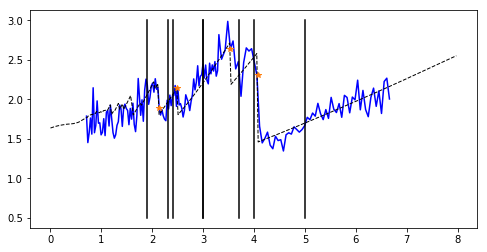

In [49]:
# # I start with Nichel
# # hkl     multiplicity     d_hkl     |F|^2
#  1  1  1         8       2.035    1610.470
#  2  0  0         6       1.762    1582.482
#  2  2  0        12       1.246    1475.309
#  3  1  1        24       1.063    1399.720
#  2  2  2         8       1.017    1375.395
#  4  0  0         6       0.881    1282.247
#  3  3  1        24       0.808    1216.550
#  4  2  0        24       0.788    1195.407
Ni_4D_av = np.load('Ni.npy')

lambda_ranges=np.zeros((4,2))


lambda_ranges[3,0] = 3.7
lambda_ranges[3,1] = 5.0

lambda_ranges[2,0] = 3.0
lambda_ranges[2,1] = 4.0

lambda_ranges[1,0] = 2.3
lambda_ranges[1,1] = 3.0

lambda_ranges[0,0] = 1.9
lambda_ranges[0,1] = 2.4


peak_pos = np.zeros(4)
peak_pos[0] =  1.063*2
peak_pos[1] = 1.246*2
peak_pos[2] = 1.762*2
peak_pos[3] = 2.035*2

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Ni_4D_av,'b', linewidth=1.5, label='Ni')
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
for i in range(0,4):
    plt.plot((lambda_ranges[i,0], lambda_ranges[i,0]),(0.5,3.0), 'k-')
    plt.plot((lambda_ranges[i,1], lambda_ranges[i,1]),(0.5,3.0), 'k-')
    plt.plot(peak_pos[i],Ni_4D_av[TOF_routines.find_nearest(peak_pos[i], lambda_bin)],'C1*')

[1.9 2.4]
[45 64]
0
Parameters([('t0', <Parameter 't0', 2.1073389012092854, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.03203790809723815, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.0003289632533313115, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -0.9250890131904519, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 1.223809225064381, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', 0.8879034573773, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 0.6195382919671331, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 19
    # variables        = 7
    chi-square         = 0.11718976
    reduced chi-square = 0.00976581
    Akaike info crit   = -82.6795948
    Bayesian info crit = -76.0685219
[[Variables]]
    t0:                 2.10586919 +/- 25044.0082 (1189248.05%) (i

C:\Users\carminati_c\git\scripts\python\ToF_notebooks\AdvancedBraggEdgeFitting_v2.py:53: RuntimeWarning: invalid value encountered in multiply
  edge = 0.5*(term3(t,t0,sigma) - term4(t,t0,alpha,sigma)* term5(t,t0,alpha,sigma))
C:\Users\carminati_c\git\scripts\python\ToF_notebooks\AdvancedBraggEdgeFitting_v2.py:60: RuntimeWarning: invalid value encountered in add
  return line_after(t,a1,a2)*B(t,t0,alpha,sigma,bool_transmission)+line_before(t,a5,a6)*(1-B(t,t0,alpha,sigma,bool_transmission))


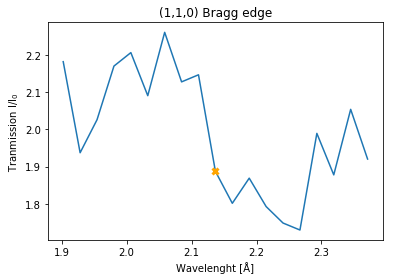

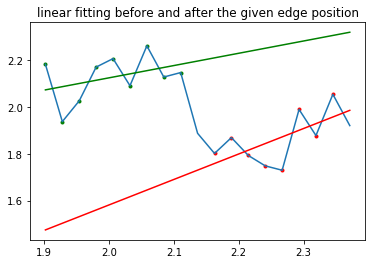

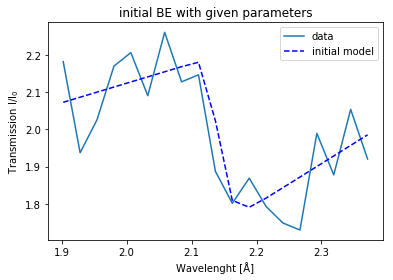

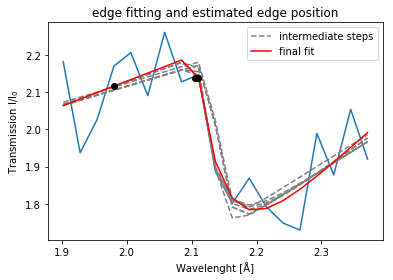

[2.3 3. ]
[60 87]
0
Parameters([('t0', <Parameter 't0', 2.502147324026256, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.03789433013638562, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.00018126550610538206, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -1.4373758578408227, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 1.267413319052073, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', 0.17638861280807266, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 0.769071938414295, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 107
    # data points      = 27
    # variables        = 7
    chi-square         = 0.20686276
    reduced chi-square = 0.01034314
    Akaike info crit   = -117.531487
    Bayesian info crit = -108.460629
[[Variables]]
    t0:                 2.50123077 +/- 0.04985713 (1.99%) (ini

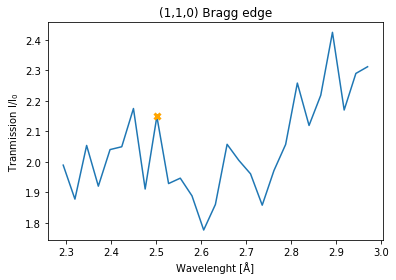

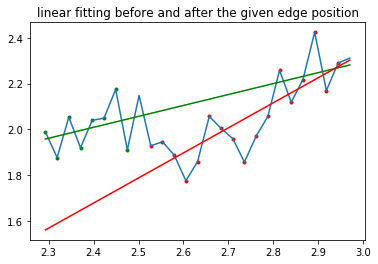

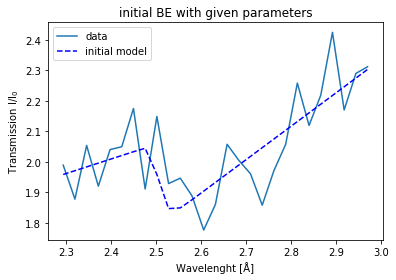

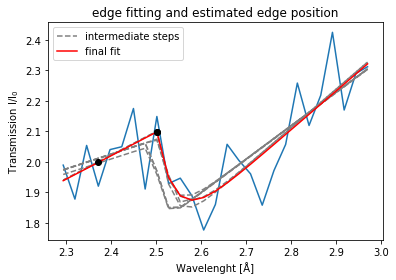

[3. 4.]
[ 87 113]
0
Parameters([('t0', <Parameter 't0', 3.6208050466230133, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.002632653600541831, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.04984885555770121, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -3.0832287849511855, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 1.4557652189865082, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -0.7981924137671436, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 1.0147218043386688, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 34
    # data points      = 26
    # variables        = 7
    chi-square         = 0.49582150
    reduced chi-square = 0.02609587
    Akaike info crit   = -88.9505315
    Bayesian info crit = -80.1438557
##  Warning: uncertainties could not be estimated:
    alpha:              a

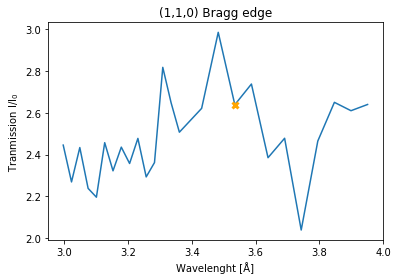

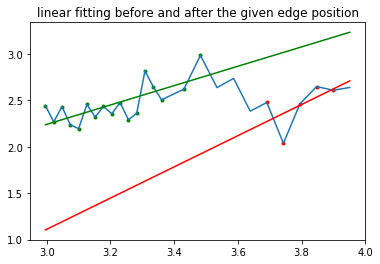

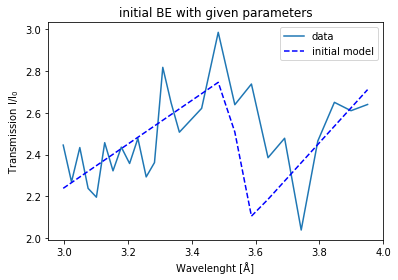

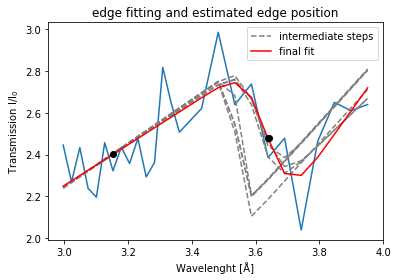

[3.7 5. ]
[107 132]
0
Parameters([('t0', <Parameter 't0', 4.070434401868046, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.004525089570799806, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.04401394813207997, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', 0.5643337156117029, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.21042607269805108, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -1.7128836722219452, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 1.09252441081788, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 108
    # data points      = 25
    # variables        = 7
    chi-square         = 0.26356971
    reduced chi-square = 0.01464276
    Akaike info crit   = -99.8078305
    Bayesian info crit = -91.2756998
[[Variables]]
    t0:                 4.06625335 +/- 0.01338508 (0.33%) (ini

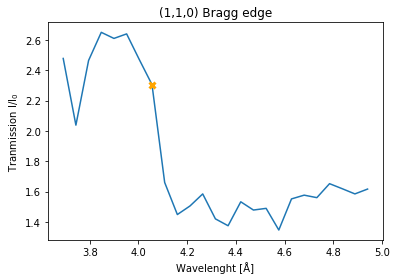

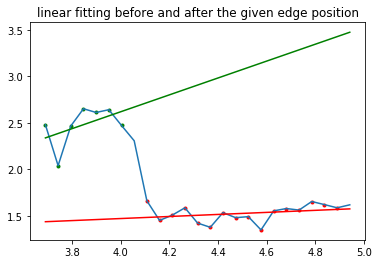

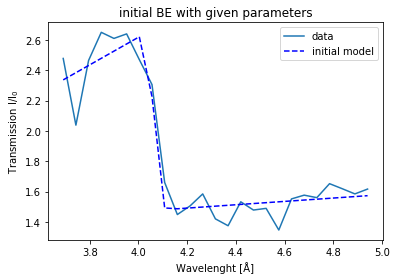

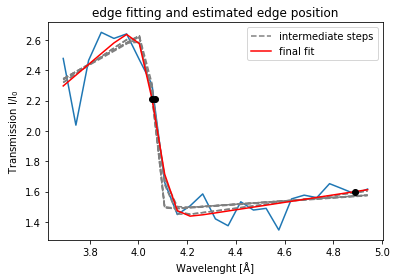

In [50]:

est_sigma = 0.01
est_alpha = np.array([0.01,0.01,0.01,0.01,0.01,0.15])
results_Ni =[]
for i in range(0, len(peak_pos)):
# for i in range(len(peaks)-6, len(peaks)-5):
    
    print(lambda_ranges[i,:])
    myrange = np.array([TOF_routines.find_nearest(lambda_bin, lambda_ranges[i,0]), TOF_routines.find_nearest(lambda_bin,lambda_ranges[i,1])])
    print(myrange)
    est_peak = TOF_routines.find_nearest(lambda_bin,peak_pos[i])

    curr_res = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(Ni_4D_av, myrange, lambda_bin, est_peak, est_sigma, est_alpha[i], False, False, True, 0)
    results_Ni.append(curr_res)

2.105869187326481
2.501230772237717
3.6411962642212004
4.066253345393225


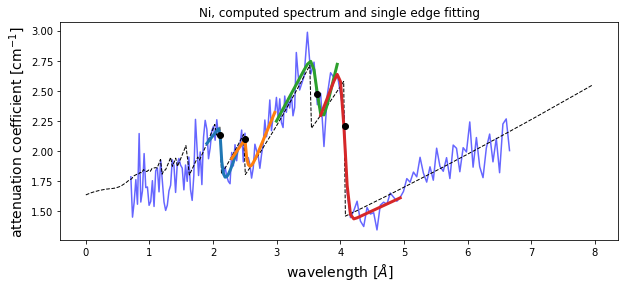

In [86]:
# here I try to make a plot with the fitting overimposed
plt.figure(figsize=(10,4))
plt.plot(lambda_bin, Ni_4D_av,'b', linewidth=1.5, alpha=0.6)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
# plt.xlim(np.min(lambda_bin),np.max(lambda_bin))

for i in range(0,4):
    x= lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges[i,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges[i,1])]
    y= results_Ni[i]['fitted_data']
    print(results_Ni[i]['t0'])
#     x_edge = lambda_bin[TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    x_edge = results_Ni[i]['t0']
    y_edge = y[TOF_routines.find_nearest(x,x_edge)]
#     y_edge = results_Ni[i]['fitted_data'][TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    plt.plot(x,y,linewidth=3)
    plt.plot(x_edge, y_edge,'o', color='k')


plt.title('Ni, computed spectrum and single edge fitting')
plt.xlabel('wavelength [$\AA$]',fontsize=14)
plt.ylabel('attenuation coefficient [cm$^{-1}$]',fontsize=14)
plt.savefig('Fitted_Ni.pdf')

In [ ]:
# I try also with Iron
lambda_ranges=np.zeros((6,2))


lambda_ranges[5,0] = 3.2
lambda_ranges[5,1] = 5.0

lambda_ranges[4,0] = 2.6
lambda_ranges[4,1] = 3.2

lambda_ranges[3,0] = 2.2
lambda_ranges[3,1] = 2.6

lambda_ranges[2,0] = 1.9
lambda_ranges[2,1] = 2.2

lambda_ranges[1,0] = 1.7
lambda_ranges[1,1] = 1.9

lambda_ranges[0,0] = 1.45
lambda_ranges[0,1] = 1.6

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Fe_4D_av[pos_Fe,:],'g', linewidth=2.5, label='Fe')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
for i in range(0,6):
    plt.plot((lambda_ranges[i,0], lambda_ranges[i,0]),(0.5,1.8), 'k-')
    plt.plot((lambda_ranges[i,1], lambda_ranges[i,1]),(0.5,1.8), 'k-')

In [70]:
results_Ni[0]
# lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges[0,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges[0,1])]

{'t0': 2.105869187326481,
 'sigma': 0.00029739489369807494,
 'alpha': 0.04233452804369071,
 'a1': -1.7020346757172373,
 'a2': 1.557329126741789,
 'a5': 0.78801240884889,
 'a6': 0.6705421271183991,
 'final_result': <lmfit.model.ModelResult at 0x23c7b9754e0>,
 'fitted_data': array([2.06356191, 2.08102228, 2.09848738, 2.11594775, 2.13340812,
        2.15087322, 2.16833359, 2.1857987 , 2.13788088, 1.91321203,
        1.81549914, 1.78409899, 1.78725602, 1.80840371, 1.83890346,
        1.87426776, 1.91213815, 1.95132019, 1.99116311]),
 'pos_extrema': [3, 8],
 'height': -0.023395128548145294}